In [66]:
%matplotlib inline
import numpy
from matplotlib import pylab as plt
from matplotlib import cm

L'équation d'un gaz selon Van der Waals s'écrit:
\begin{align*}
p &= \frac{RT}{V_{\text{m}}-b} - \frac{a}{V_{\text{m}}^2}
\end{align*}

Les coefficients $a$ et $b$ sont appelés **coefficients de van der Waals**. Ils sont différents pour chaque gaz mais indépendants de la température.

On définit ci-dessous les coefficients a et b pour différents gaz:

In [67]:
class Gas:
    def __init__(self, a, b, pc, Vc, Tc):
        self.a = a # in l^2 atm mol^{-2}
        self.b = b # in l mol^-1
        self.pc = pc # in atm
        self.Vc = Vc # in l mol^-1
        self.Tc = Tc # in K
    def pressure(self, Vm, T):
        part1 = 0.08205 * T / (Vm - self.b)
        part2 = self.a / (Vm * Vm)
        return part1 - part2
    def criticalValuesFromVDW(self):
        Vc = 3 * self.b
        pc = self.a / (27 * self.b * self.b)
        Tc = 8 * self.a / (27 * 0.08205 * self.b)
        return (pc, Vc, Tc)
listOfGas = {}
listOfGas["Ar"] = Gas(1.337, 3.20e-2, 48.0, 75.3e-3, 150.7)
listOfGas["C2H4"] = Gas(4.552, 5.82e-2, 50.50, 124e-3, 283.1)
listOfGas["C2H6"] = Gas(5.507, 6.51e-2, 48.20, 148e-3, 305.4)
listOfGas["C6H6"] = Gas(18.57, 11.93e-2, 48.6, 260e-3, 562.7)
listOfGas["CH4"] = Gas(2.273, 4.31e-2, 45.6, 98.7e-3, 190.6)
listOfGas["Cl2"] = Gas(6.260, 5.42e-2, 76.1, 124e-3, 417.2)
#listOfGas["CO"] = Gas(1.453, 3.95e-2, None, None, None)
listOfGas["CO2"] = Gas(3.610, 4.29e-2, 72.9, 94.0e-3, 304.2)
listOfGas["H2"] = Gas(0.2420, 2.65e-2, 12.8, 34.99e-3, 33.23)
listOfGas["H2O"] = Gas(5.464, 3.05e-2, 218.3, 55.3e-3, 647.4)
#listOfGas["H2S"] = Gas(4.484, 4.34e-2, None, None, None)
listOfGas["He"] = Gas(0.0341, 2.38e-2, 2.26, 57.8e-3, 5.2)
listOfGas["Kr"] = Gas(5.125, 1.06e-2, 54.27, 92.24e-3, 209.39)
listOfGas["N2"] = Gas(1.352, 3.87e-2, 33.54, 90.10e-3, 126.3)
listOfGas["Ne"] = Gas(0.205, 1.67e-2, 26.86, 41.74e-3, 44.44)
listOfGas["NH3"] = Gas(4.169, 3.71e-2, 111.3, 72.5e-3, 405.5)
listOfGas["O2"] = Gas(1.364, 3.19e-2, 50.14, 78.0e-3, 154.8)
#listOfGas["SO2"] = Gas(6.775, 5.68e-2, None, None, None)
listOfGas["Xe"] = Gas(4.137, 5.16e-2, 58.0, 118.8e-3, 289.75)


A partir de cette équation, on peut tracer différentes isothermes.
Ci-dessous on choisi le gaz et les différentes températures pour lesquelles on veut tracer un isotherme.

In [68]:
gas = listOfGas["H2O"]
temperatures = [200, 298.15, 400, 500, 800] # in Kelvin

On trace alors les isothermes:

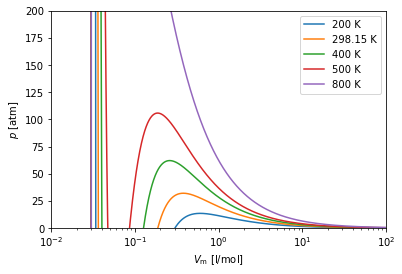

In [69]:
Vm = numpy.linspace(0, 500, 1000000) # volume molaire en l mol-1
plt.xlabel(r"$V_{\mathrm{m}}$ [l/mol]")
plt.xscale("log")
plt.xlim(0.01, 100)
plt.ylabel(r"$p$ [atm]")
plt.ylim(0, 200)
for temperature in temperatures:
    p = gas.pressure(Vm, temperature)
    plt.plot(Vm, p, label=f"{temperature} K")
plt.legend()

Les coefficients de van der Waals peuvent être reliées aux constantes critiques:
\begin{align*}
V_{\text{c}} &= 3 b\\
p_{\text{c}} &= \frac{a}{27b^2}\\
T_{\text{c}} &= \frac{8a}{27 Rb} \\
Z_{\text{c}} &= \frac{p_{\text{c}} V_{\text{c}}}{R T_{\text{c}}} = \frac{3}{8}
\end{align*} 

Les valeurs de ces constantes critiques pour le gaz sélectionné ci-dessus valent:

In [70]:
pc, Vc, Tc = gas.criticalValuesFromVDW()
print(f"Pression critique {pc:.3f} atm")
print(f"Volume molaire critique {Vc*1000:.3f} cm^3/mol")
print(f"Temperature critique {Tc:.3f} K")
print(f"Coefficient de compression critique {pc*Vc/(0.08205 * Tc):.3f} ")

Pression critique 217.544 atm
Volume molaire critique 91.500 cm^3/mol
Temperature critique 646.932 K
Coefficient de compression critique 0.375 


Ces valeurs peuvent être comparées aux valeurs expérimentales:

In [71]:
print(f"Pression critique {gas.pc:.3f} atm")
print(f"Volume molaire critique {gas.Vc*1000:.3f} cm^3/mol")
print(f"Temperature critique {gas.Tc:.3f} K")
print(f"Coefficient de compression critique {gas.pc*gas.Vc/(0.08205 * gas.Tc):.3f} ")

Pression critique 218.300 atm
Volume molaire critique 55.300 cm^3/mol
Temperature critique 647.400 K
Coefficient de compression critique 0.227 


L'équation de van der Waals respecte le principe de correspondance des états. Ce principe consiste à rapporter les propriétés (ici $p$, $V_{\text{m}}$ et $T$) par rapport à des valeurs de référence, ici les valeurs au point critique. On introduit alors trois **variables réduites**:
\begin{align*}
p_{\text{r}} &= \frac{p}{p_{\text{c}}}\\
V_{\text{r}} &= \frac{V_{\text{m}}}{V_{\text{c}}}\\
T_{\text{r}} &= \frac{T}{T_{\text{c}}}
\end{align*}

On peut réécrire l'équation de van der Waals en terme de ces variables réduites. On observe alors que cette équation devient indépendante de la nature du gaz:
\begin{align*}
p_{\text{r}} &= \frac{8 T_{\text{r}}}{3 V_{\text{r}} - 1} - \frac{3}{V_{\text{r}}^2}
\end{align*}

Les isothermes tracés à partir de cette équation sont identiques qu'importe le gaz:

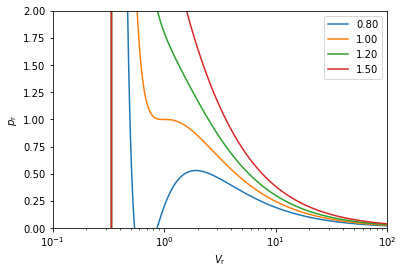

In [72]:
def reducedPressureFromVDW(Vr, Tr):
    part1 = 8 * Tr / (3*Vr - 1)
    part2 = 3 / (Vr * Vr)
    return part1 - part2
Vr = numpy.linspace(0, 100, 10000) # volume réduit
reducedTemperatures = [0.8, 1.0, 1.2, 1.5]
plt.xlabel(r"$V_{\mathrm{r}}$")
plt.xscale("log")
plt.xlim(0.1, 100)
plt.ylabel(r"$p_{\mathrm{r}}$")
plt.ylim(0, 2)
for reducedTemperature in reducedTemperatures:
    pr = reducedPressureFromVDW(Vr, reducedTemperature)
    plt.plot(Vr, pr, label=f"{reducedTemperature:.2f}")
plt.legend()

Ci-dessous, on trace les isothermes de différents gaz en terme des variables réduites en prenant les variables critiques expérimentales: 

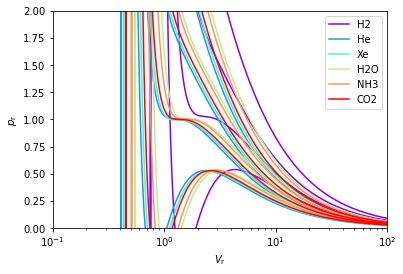

In [74]:
import itertools
theListOfGas = ["H2", "He", "Xe", "H2O", "NH3", "CO2"]
reducedTemperatures = [0.8, 1.0, 1.2, 1.5]
plt.xlabel(r"$V_{\mathrm{r}}$")
plt.xscale("log")
plt.xlim(0.1, 100)
plt.ylabel(r"$p_{\mathrm{r}}$")
plt.ylim(0, 2)
colors = itertools.cycle(cm.rainbow(numpy.linspace(0, 1, len(theListOfGas))))
for gas in theListOfGas:
    g = listOfGas[gas]
    pc, Vc, Tc = (g.pc, g.Vc, g.Tc)
    #pc, Vc, Tc = g.criticalValuesFromVDW() # if we use the VDW critical values, we find back the previous plot
    Vm = numpy.linspace(0, 100, 1000000) # volume molaire en l mol-1
    Vr = Vm / Vc
    color = next(colors)
    for (i, reducedTemperature) in enumerate(reducedTemperatures):
        p = g.pressure(Vm, reducedTemperature*Tc)
        pr = p / pc
        if i == 0:
            plt.plot(Vr, pr, label=f"{gas}", color=color)
        else:
            plt.plot(Vr, pr, color=color)
plt.legend()